# Game Sales Analysis: Insights from Global Video Game Sales Data

The video game industry has experienced tremendous growth over the years, with sales influenced by factors such as platform popularity, game genre, and regional preferences. This analysis aims to explore key trends in video game sales using a dataset containing details such as game titles, platforms, release years, genres, publishers, and sales figures across various regions (North America, Europe, Japan, and others).

By examining sales data at both regional and global levels, this study seeks to uncover top-performing games, platform dominance, genre preferences, and regional trends. Through data-driven insights, we can identify patterns that contribute to a game's commercial success and gain a better understanding of how different markets influence overall sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
!gdown 1puwYoYl3LnPU_sF2NKN5OAoRjTfpm-VY

Downloading...
From: https://drive.google.com/uc?id=1puwYoYl3LnPU_sF2NKN5OAoRjTfpm-VY
To: /content/vgsales.csv
100% 1.36M/1.36M [00:00<00:00, 27.8MB/s]


In [3]:
df = pd.read_csv("vgsales.csv")

In [4]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
print(df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [6]:
print(f"shape :{df.shape}")
print(f"length :{len(df)}")

shape :(16598, 11)
length :16598


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
# null values
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [9]:
# chcek duplicate
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [10]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Data PreProcessing

In [11]:
# drop null values
df = df.dropna(subset=["Year","Publisher"])

In [12]:
df["Year"] = df.loc[:, "Year"].astype(np.int32)

<ipython-input-12-79ce8eb54990>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df.loc[:, "Year"].astype(np.int32)


# EDA

#### **What is the distribution of platform?**

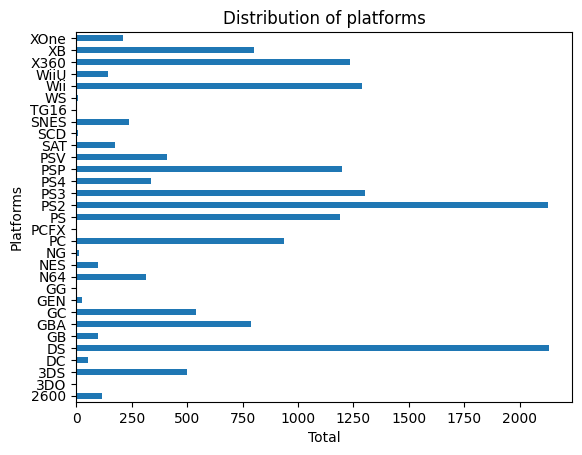

In [13]:
df.groupby("Platform")["Platform"].count().plot(kind="barh")
plt.title("Distribution of platforms")
plt.xlabel("Total")
plt.ylabel("Platforms")
plt.show()

From the platform distribution visualization, we can observe that PS2 and DS exhibit nearly equal highest distributions.

#### **What is total number of publishers?**

In [14]:
print(df["Publisher"].nunique())

576


####  **What is the distribution of genre and how many unique genre are there?**

In [15]:
print(df["Genre"].nunique())

12


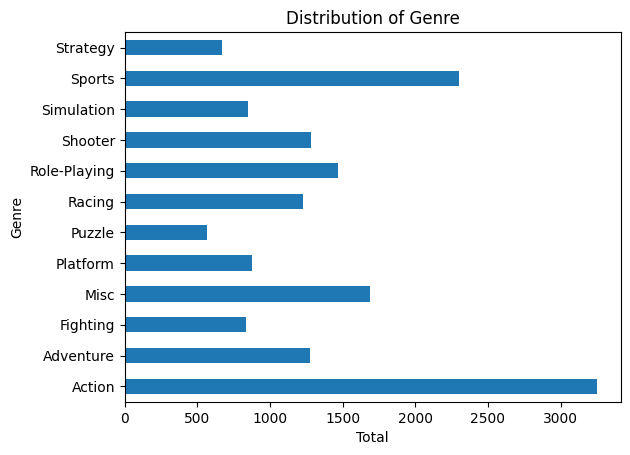

In [16]:
df.groupby("Genre")["Genre"].count().plot(kind="barh")
plt.title("Distribution of Genre")
plt.xlabel("Total")
plt.ylabel("Genre")
plt.show()

This bar chart compares total game counts across genres. Action dominates, exceeding 3000. Sports ranks second at around 2000. Other genres—Shooter, Role-Playing, and Strategy—trail behind. Puzzle, Racing, and Fighting remain comparatively low. Overall, the data shows Action as the most popular genre by a substantial margin.

####  **What is the distrbution of sales by region and global?**

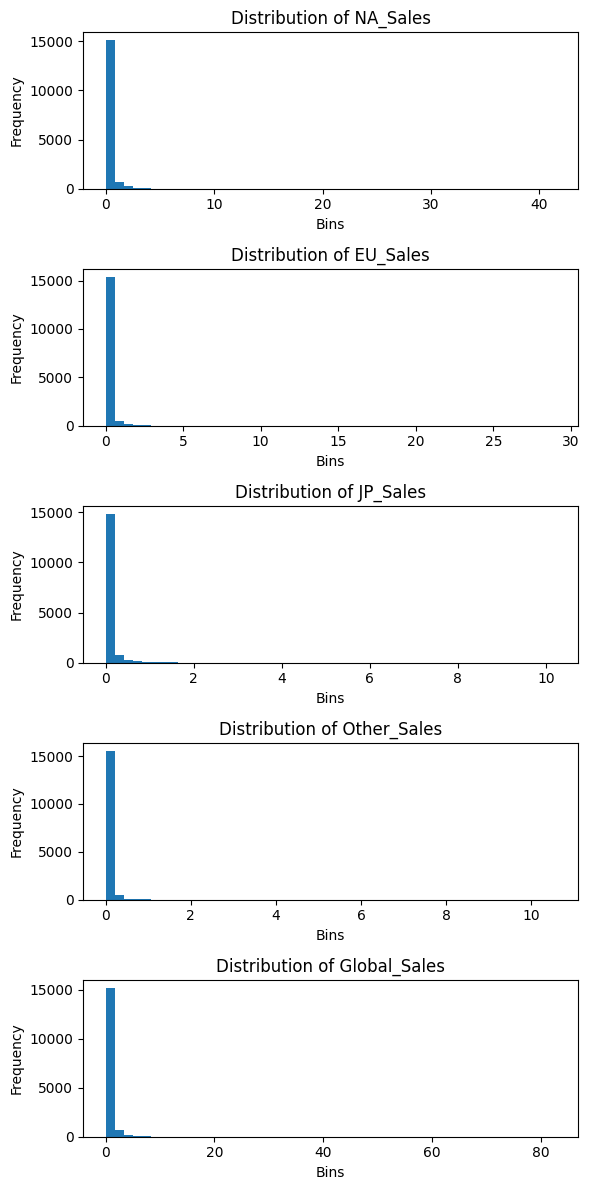

In [17]:
sales = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
plt.figure(figsize=(6,12))
for i,v in enumerate(sales.columns):
    ax = plt.subplot(5,1,i+1)
    ax.hist(df[v], bins=50)
    ax.set_title(f"Distribution of {v}")
    ax.set_xlabel("Bins")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

The visualizations for NA_Sales, EU_Sales, JP_Sales, Other_Sales, and Global_Sales each show a positive skew. This means most games record relatively low sales, while a small number of high-selling titles extend the distribution’s tail to the right.

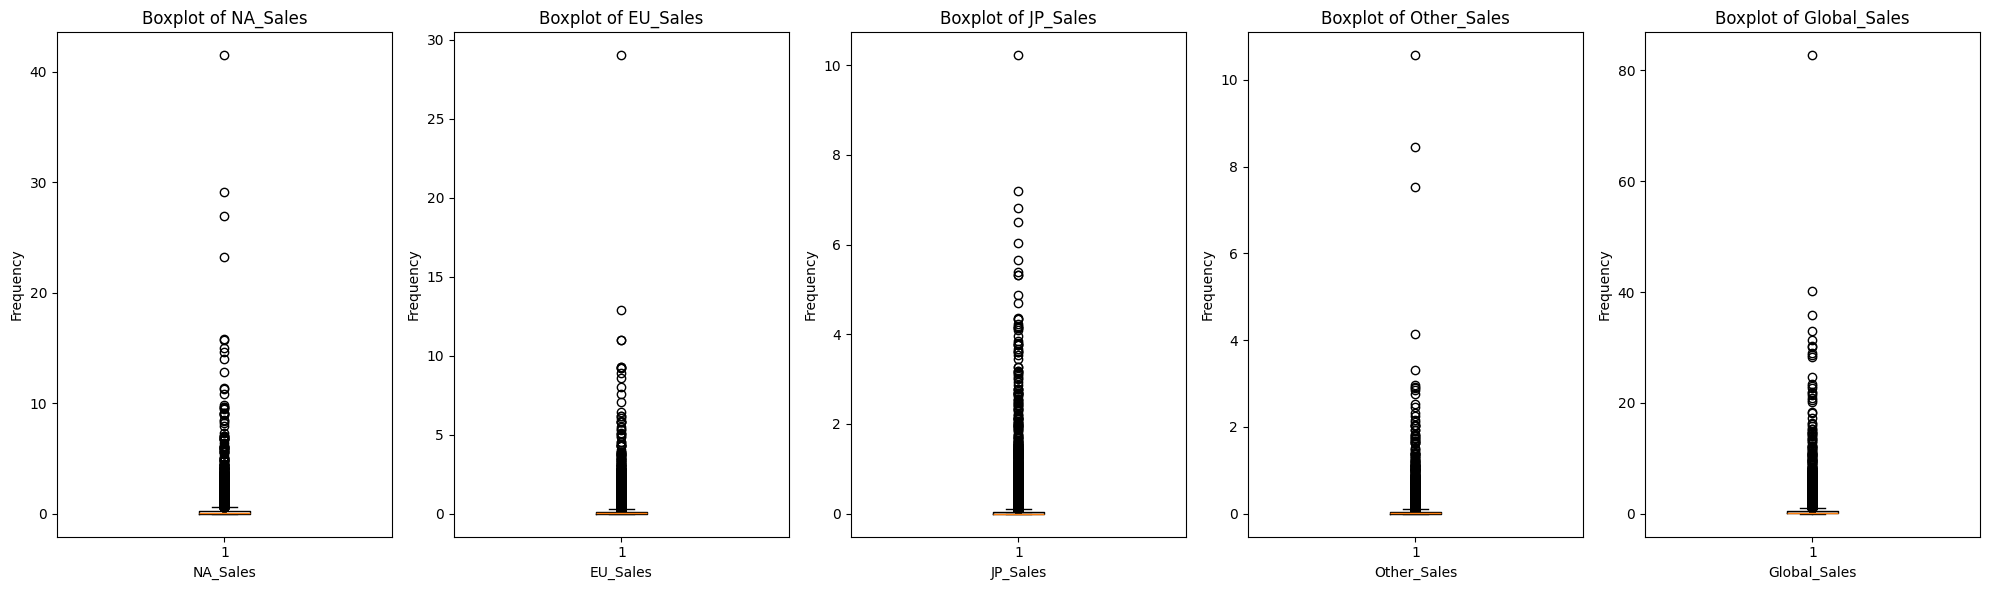

In [18]:
sales = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
plt.figure(figsize=(20,6))
for i,v in enumerate(sales.columns):
    ax = plt.subplot(1,5,i+1)
    ax.boxplot(df[v])
    ax.set_title(f"Boxplot of {v}")
    ax.set_xlabel(f"{v}")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

####  **Which regions prefer which platform the most for playing video games?**

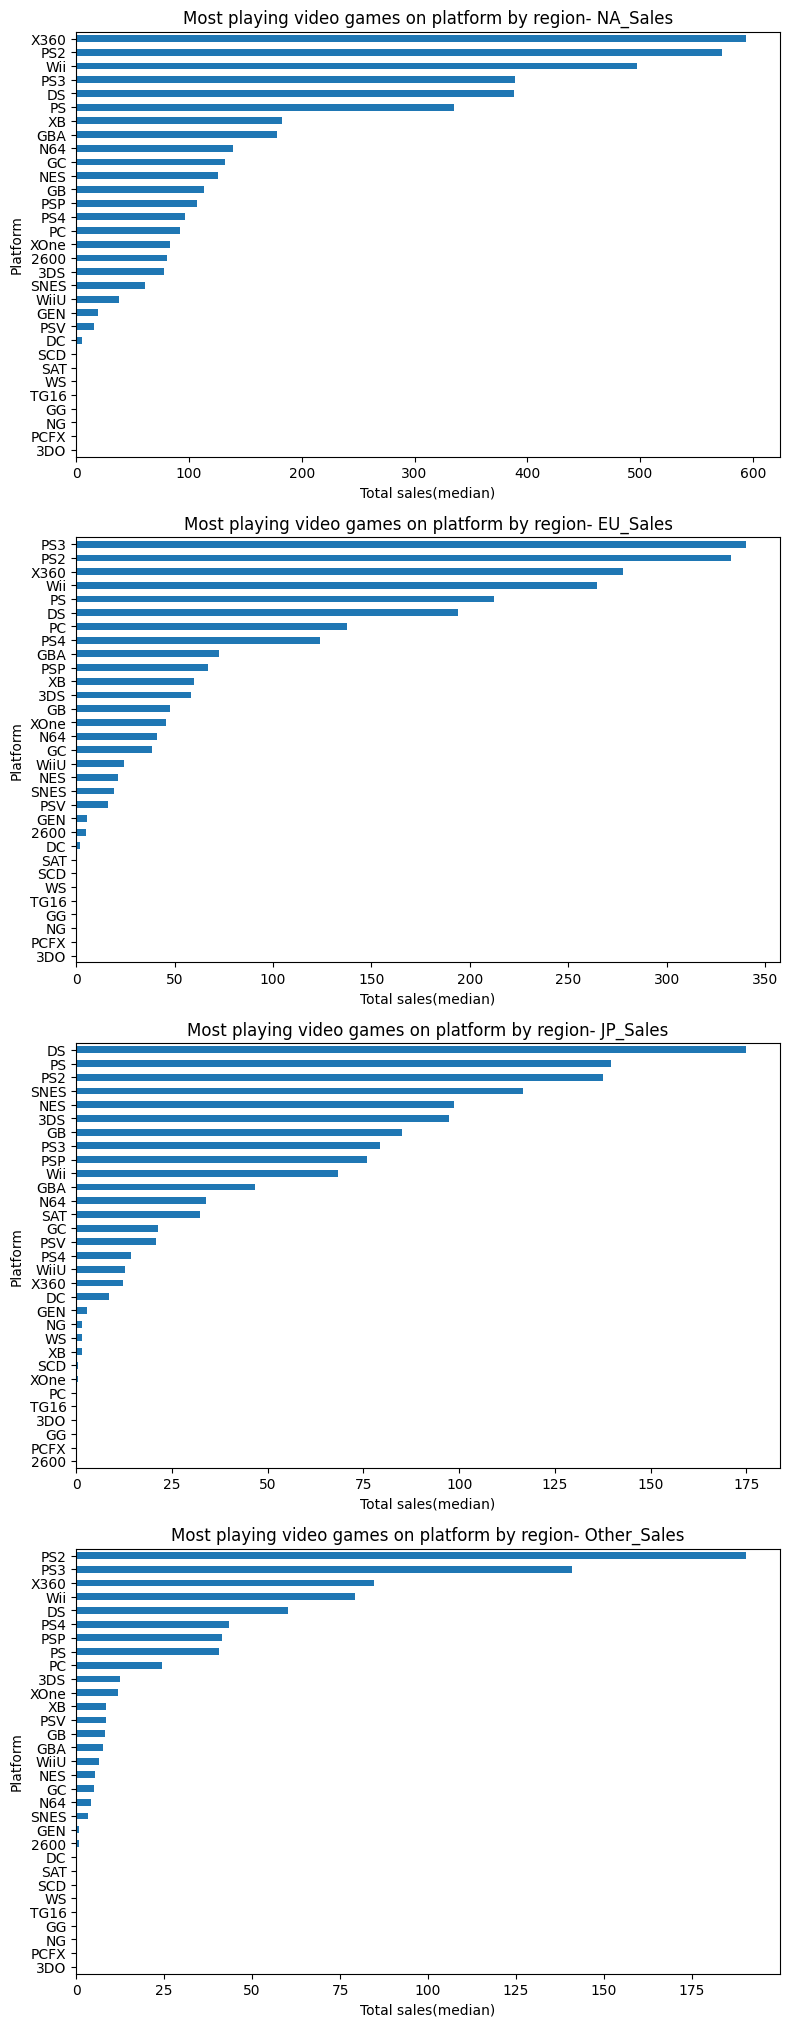

In [84]:
rp = df[['Platform','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
plt.figure(figsize=(8,25))
for i,v in enumerate(rp.columns[1:]):
    ax = plt.subplot(5,1,i+1)
    temp = rp[['Platform', v]]
    #temp = temp[temp[v] > 0] # dont capture the entire landscape
    temp.groupby("Platform")[v].sum().sort_values(ascending=True).plot(kind="barh", ax=ax)
    ax.set_title(f"Most playing video games on platform by region- {v}")
    ax.set_xlabel("Total sales(median)")

plt.tight_layout()
plt.show()

Based on the visualization, the most popular platform is Xbox306 in North America, PS3 in Europe, DS in Japan, and PS2 in other regions.

#### **What is the most popular platform for playing video games?**

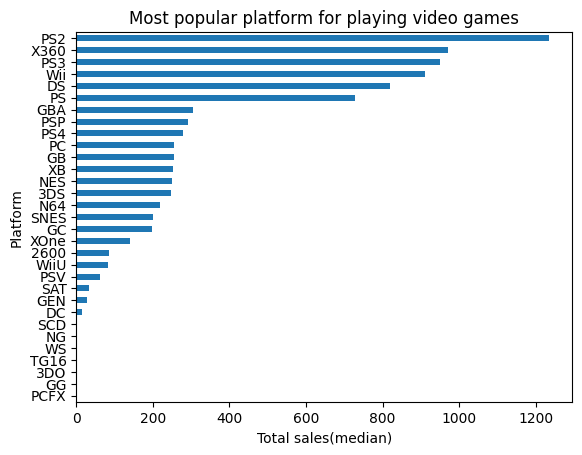

In [85]:
df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=True).plot(kind="barh")
plt.title(f"Most popular platform for playing video games")
plt.xlabel("Total sales(median)")
plt.show()

Based on the visualization, the most popular platform for playing video games is PS2, and the second is Xbox 360.

#### **How to annual video game sales vary per year in each region?**

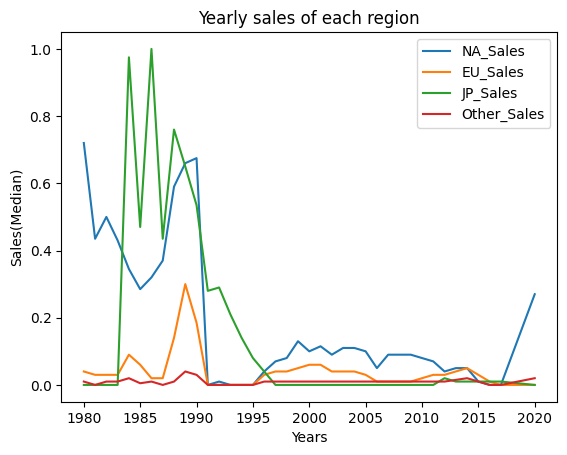

In [49]:
sales = df[['Year','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
sales.groupby("Year").median().plot(kind="line")
plt.title("Yearly sales of each region")
plt.xlabel("Years")
plt.ylabel("Sales(Median)")
plt.show()

The graph shows yearly sales trends for four regions (NA, EU, JP, Other) from 1980 to 2020. Sales peaked in the late 1980s and early 1990s, with North America and Japan experiencing the highest spikes, followed by a significant decline and stabilization in later years.

#### **Which top 5 platforms for playing video games have been the most popular each year?**

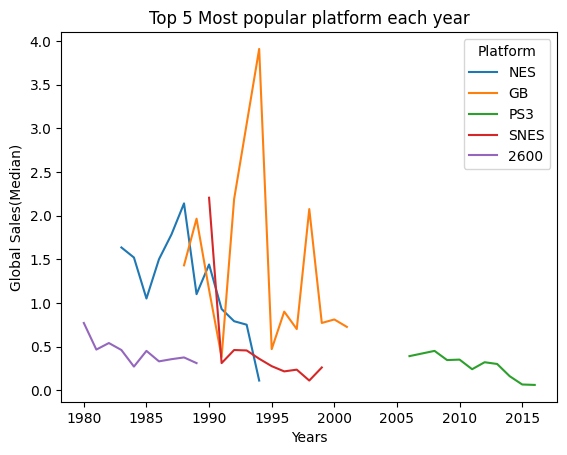

In [67]:
limit = 5
top = df.groupby('Platform')['Global_Sales'].median().sort_values(ascending=False)
top = top.index[:limit]
ppg = df[df['Platform'].isin(top)]

sns.lineplot(x="Year", y="Global_Sales", hue="Platform",errorbar=None,estimator="median", data=ppg)
plt.title(f"Top {limit} Most popular platform each year")
plt.xlabel("Years")
plt.ylabel("Global Sales(Median)")
plt.show()

The graph illustrates the global sales of the top 5 gaming platforms from 1980 to 2015. The Nintendo Entertainment System (NES) and Game Boy (GB) show prominent sales peaks in the late 1980s and early 1990s. The Super Nintendo (SNES) and Atari 2600 also appear, with the GameBoy having the most dramatic spike around 1990. PS3 appears later, showing a modest sales trend in the 2000s.

#### **Which platforms for playing video games have been the most popular each year based  on region?**

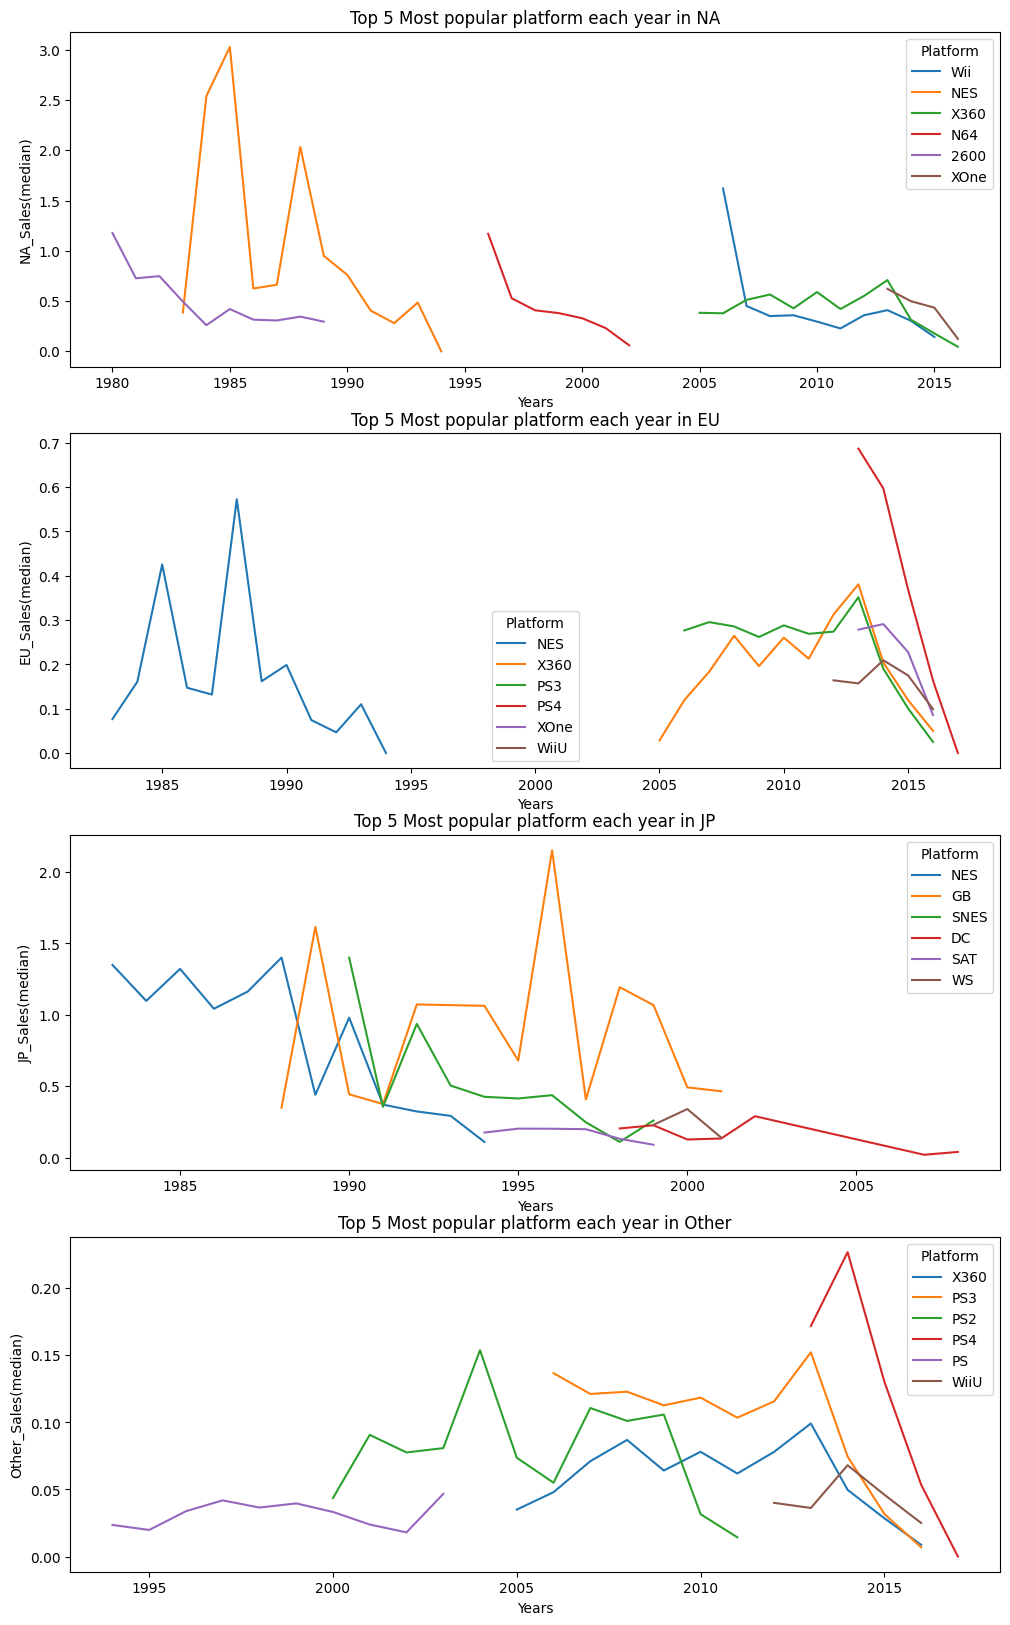

In [57]:
regions = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
limit = 5
plt.figure(figsize=(12,20))
for i,v in enumerate(regions):
    ax = plt.subplot(4,1,i+1)
    top = df.groupby('Platform')[v].median().sort_values(ascending=False)
    top = top.index[:limit+1]
    ppg = df[df['Platform'].isin(top)]
    sns.lineplot(x="Year", y=v, hue="Platform",errorbar=None, data=ppg, ax=ax)
    plt.title(f"Top {limit} Most popular platform each year in {v.split('_')[0]}")
    plt.xlabel("Years")
    plt.ylabel(f"{v}(median)")

plt.show()

#### **What is the most popular genre?**

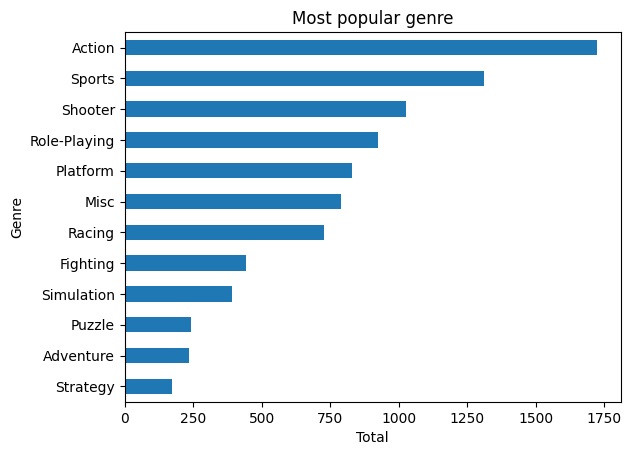

In [86]:
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=True).plot(kind="barh")
plt.title("Most popular genre")
plt.xlabel("Total")
plt.show()

The most popular genre world-wide is action games.

#### **Which regions prefer which genre the most?**

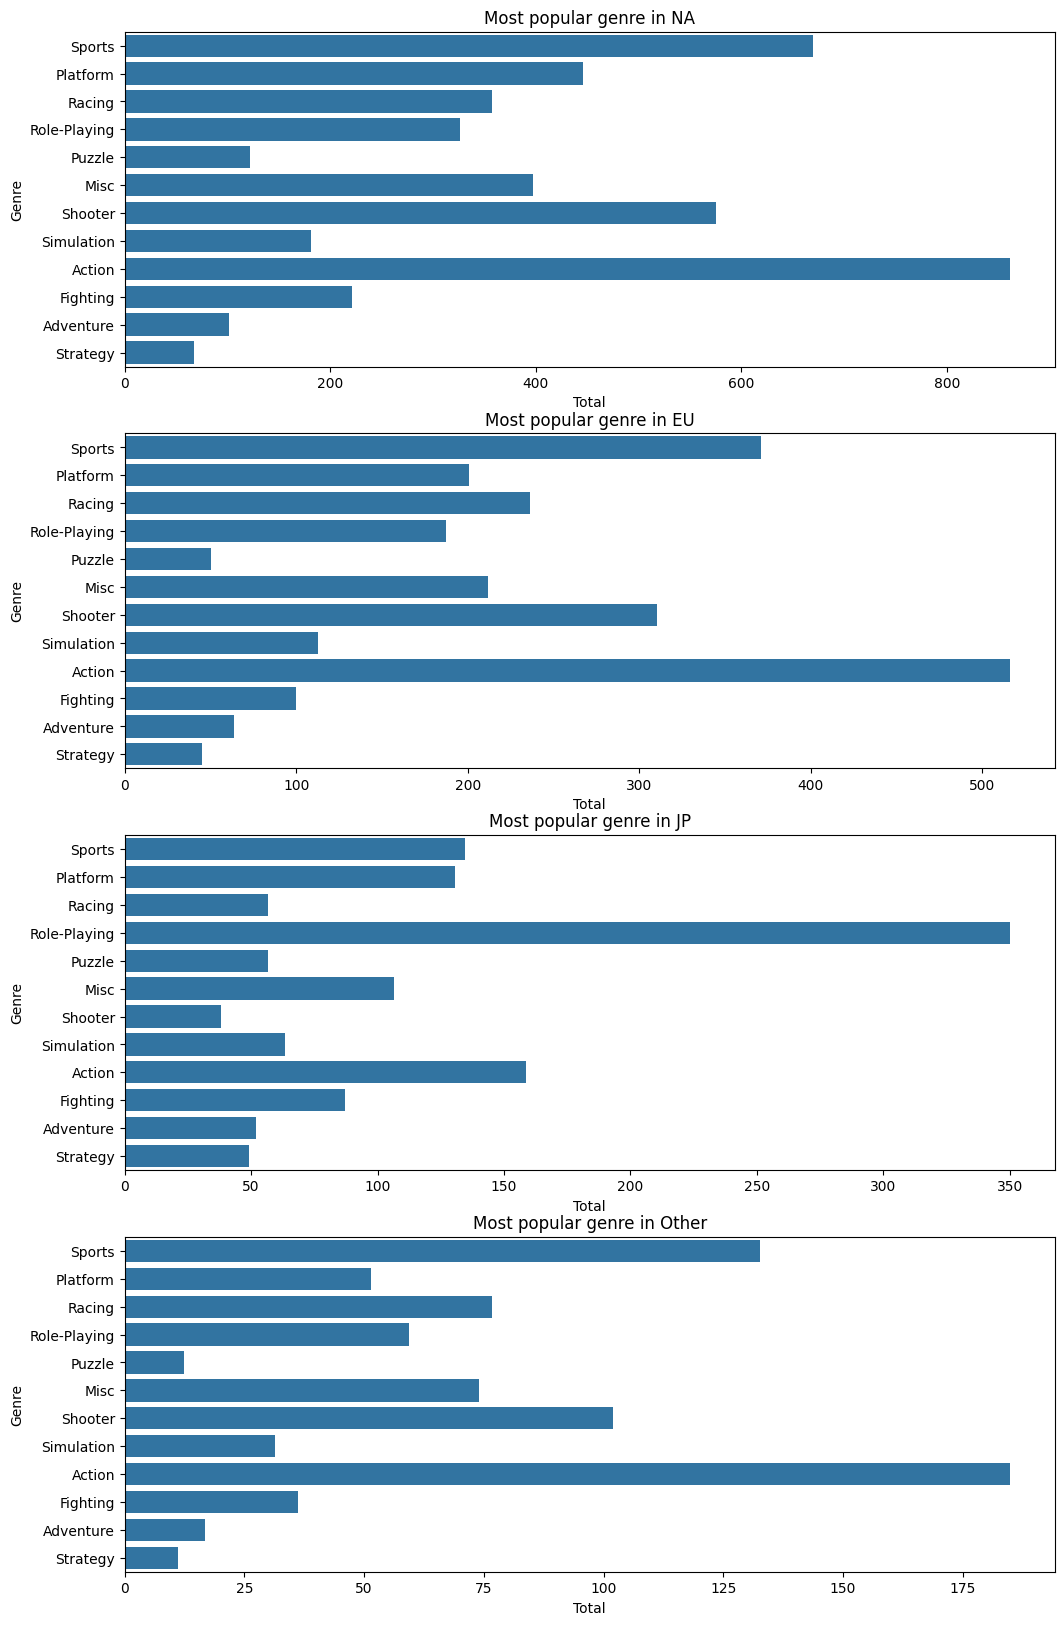

In [90]:
regions = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize=(12,20))
for i,v in enumerate(regions):
    ax = plt.subplot(4,1,i+1)
    sns.barplot(x = v, y="Genre",errorbar=None,estimator="sum", data=df)
    plt.title(f"Most popular genre in {v.split('_')[0]}")
    plt.xlabel("Total")

plt.show()

Based on the visualizations, the most popular genre in North America is action, followed by sports. In the EU, the most popular genres are , followed by sports , as same as North America . In Japan, role-playing is most dominated genre, followed by action . In other countries, action is the most popular,and having the almost same distribution like EU and NA.

#### **Which genres have been more or less popular with the passing of time?**

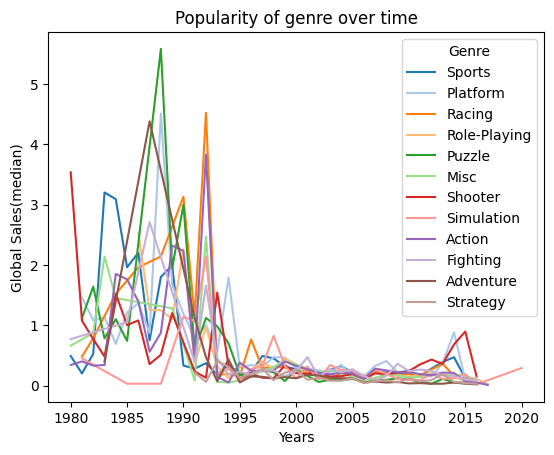

In [55]:
sns.lineplot(x="Year", y="Global_Sales", hue="Genre",errorbar=None,palette="tab20",estimator="median", data=df)
plt.title("Popularity of genre over time")
plt.xlabel("Years")
plt.ylabel("Global Sales(median)")
plt.show()

The graph shows the popularity of various video game genres from 1980 to 2020. There are significant peaks in genre popularity during the late 1980s and early 1990s, with genres like Misc, Role-Playing, and Puzzle experiencing dramatic spikes. After the mid-1990s, genre popularity stabilizes, with more subtle fluctuations and generally lower overall global sales across different game types.

#### **Which genres have been more or less popular with the passing of time in each region?**

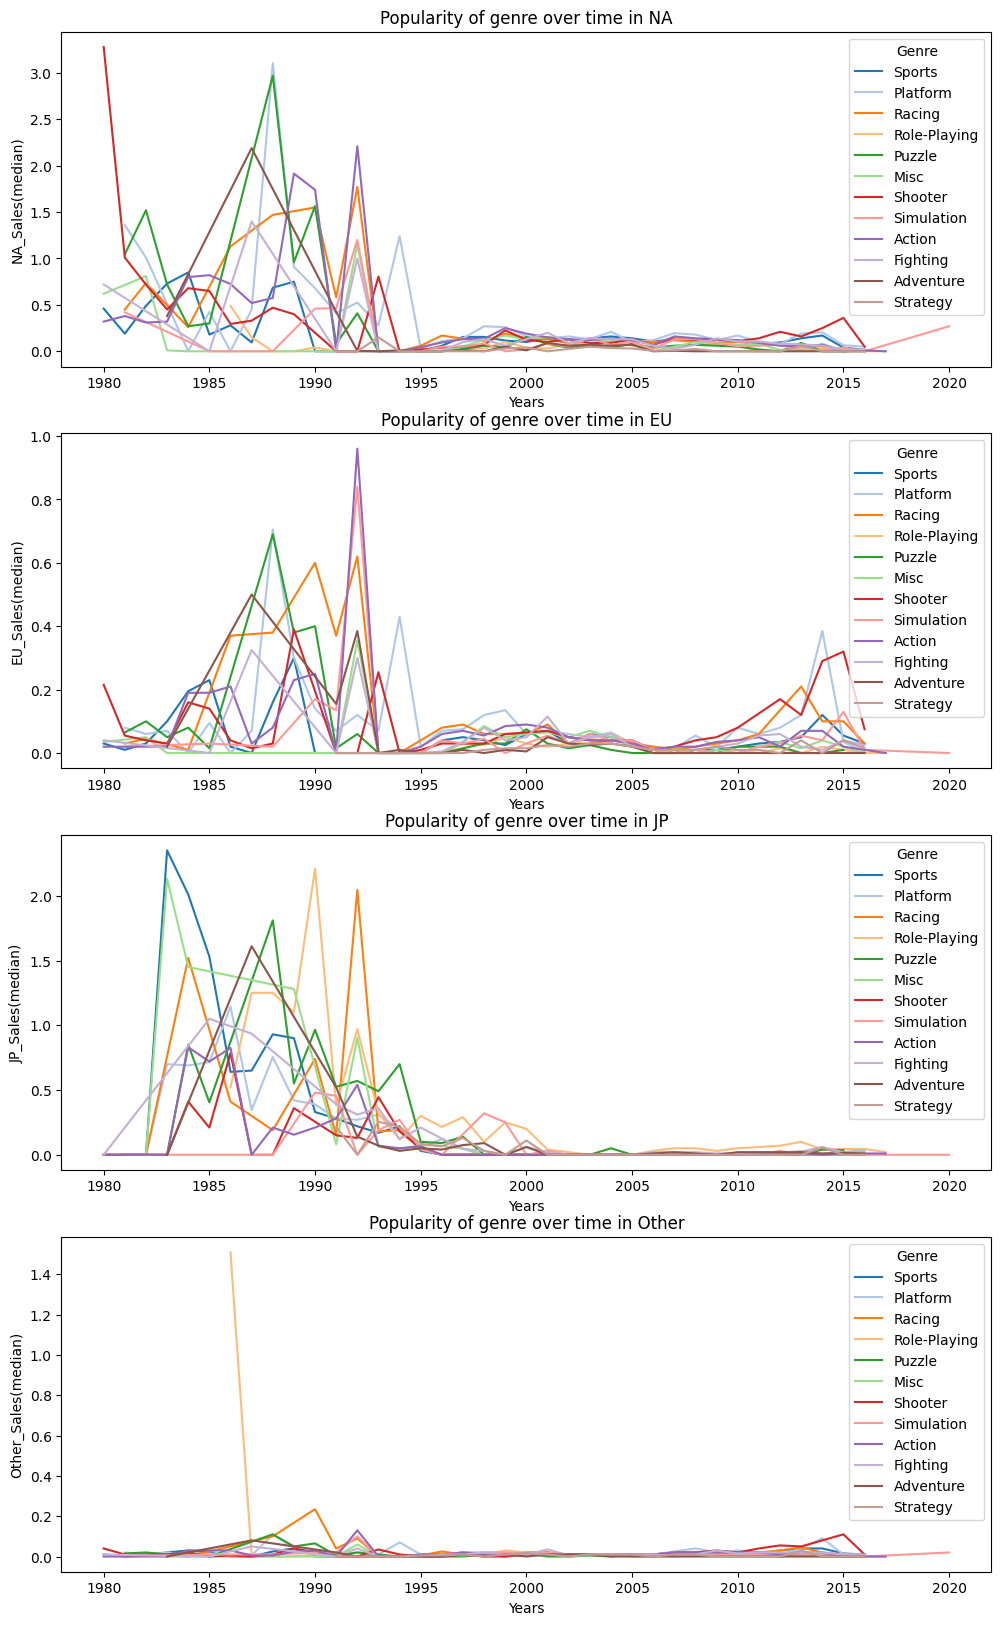

In [56]:
regions = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize=(12,20))
for i,v in enumerate(regions):
    ax = plt.subplot(4,1,i+1)
    sns.lineplot(x="Year", y=v, hue="Genre",errorbar=None,palette="tab20",estimator="median", data=df)
    plt.title(f"Popularity of genre over time in {v.split('_')[0]}")
    plt.xlabel("Years")
    plt.ylabel(f"{v}(median)")

plt.show()

#### **What are the top 5 publishers or what games and genres profited them most?**

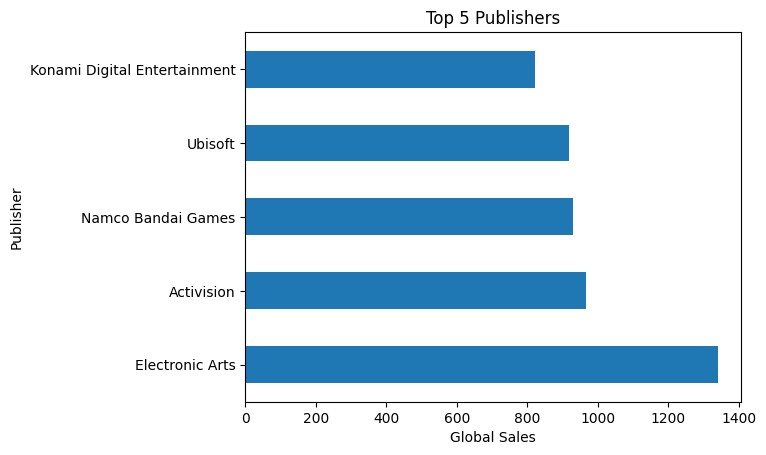

In [111]:
limit = 5
df.groupby("Publisher")["Global_Sales"].count().sort_values(ascending=False)[:limit].plot(kind="barh")
plt.title(f"Top {limit} Publishers")
plt.xlabel("Global Sales")
plt.show()

From the visualization, we can observe that Nintendo is the most popular publisher, with approximately 1,760 million global sales. Electronic Arts holds the second position, with total global sales of around 1,200 million.

In [82]:
top = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)[:limit]
print(f"Top {limit} publishers:")
for i,v in enumerate(top.index.values):
    print(f"{1+i}. {v}")

Top 5 publishers:
1. Nintendo
2. Electronic Arts
3. Activision
4. Sony Computer Entertainment
5. Ubisoft


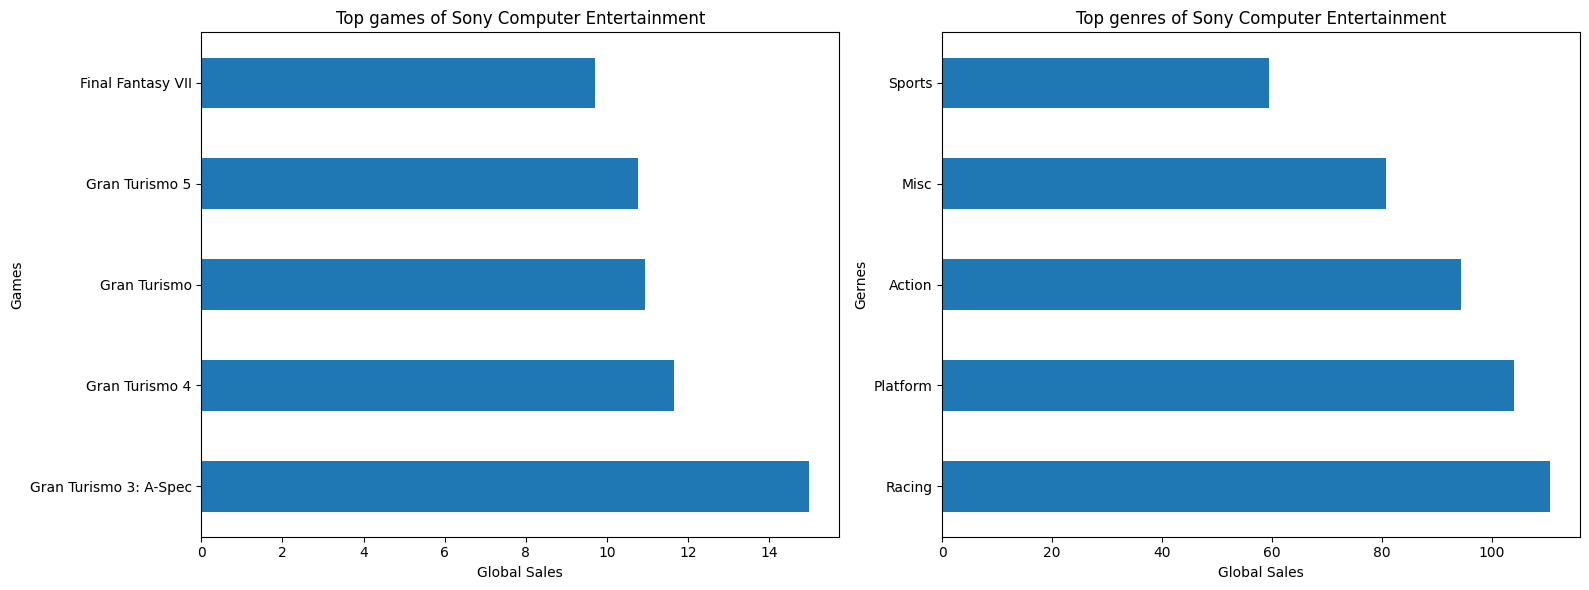

In [83]:
def publishers_info(idx, top, df, limit=5):
    try:
        p = top.index[idx-1]
        data = df[df['Publisher'] == p]
        fig, axis = plt.subplots(1,2,figsize=(16,6))
        top_games = data.groupby("Name")['Global_Sales'].sum().sort_values(ascending=False)[:limit]
        top_genres = data.groupby("Genre")['Global_Sales'].sum().sort_values(ascending=False)[:limit]
        top_games.plot(kind='barh', ax=axis[0])
        axis[0].set_title(f"Top games of {p}")
        axis[0].set_xlabel("Global Sales")
        axis[0].set_ylabel("Games")

        top_genres.plot(kind='barh', ax=axis[1])
        axis[1].set_title(f"Top genres of {p}")
        axis[1].set_xlabel("Global Sales")
        axis[1].set_ylabel("Gernes")

        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(e)
publishers_info(4, top, df)

#### **Which are top 5 preferred publishers in each region?**

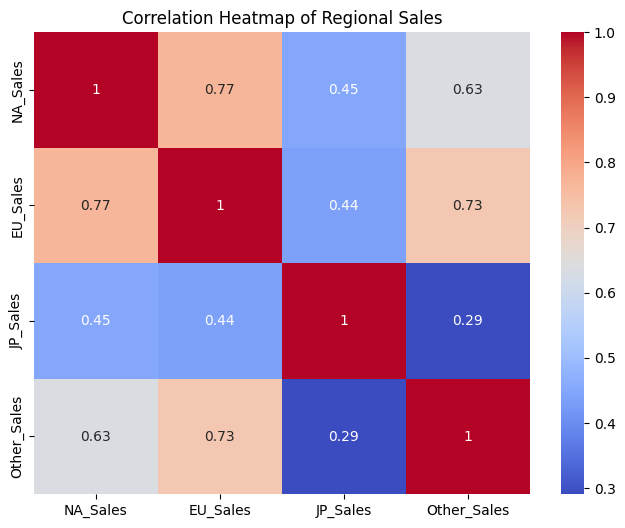

In [43]:
# Correlation Analysis: Heatmap of Regional Sales
plt.figure(figsize=(8, 6))
corr_matrix = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Regional Sales")
plt.show()

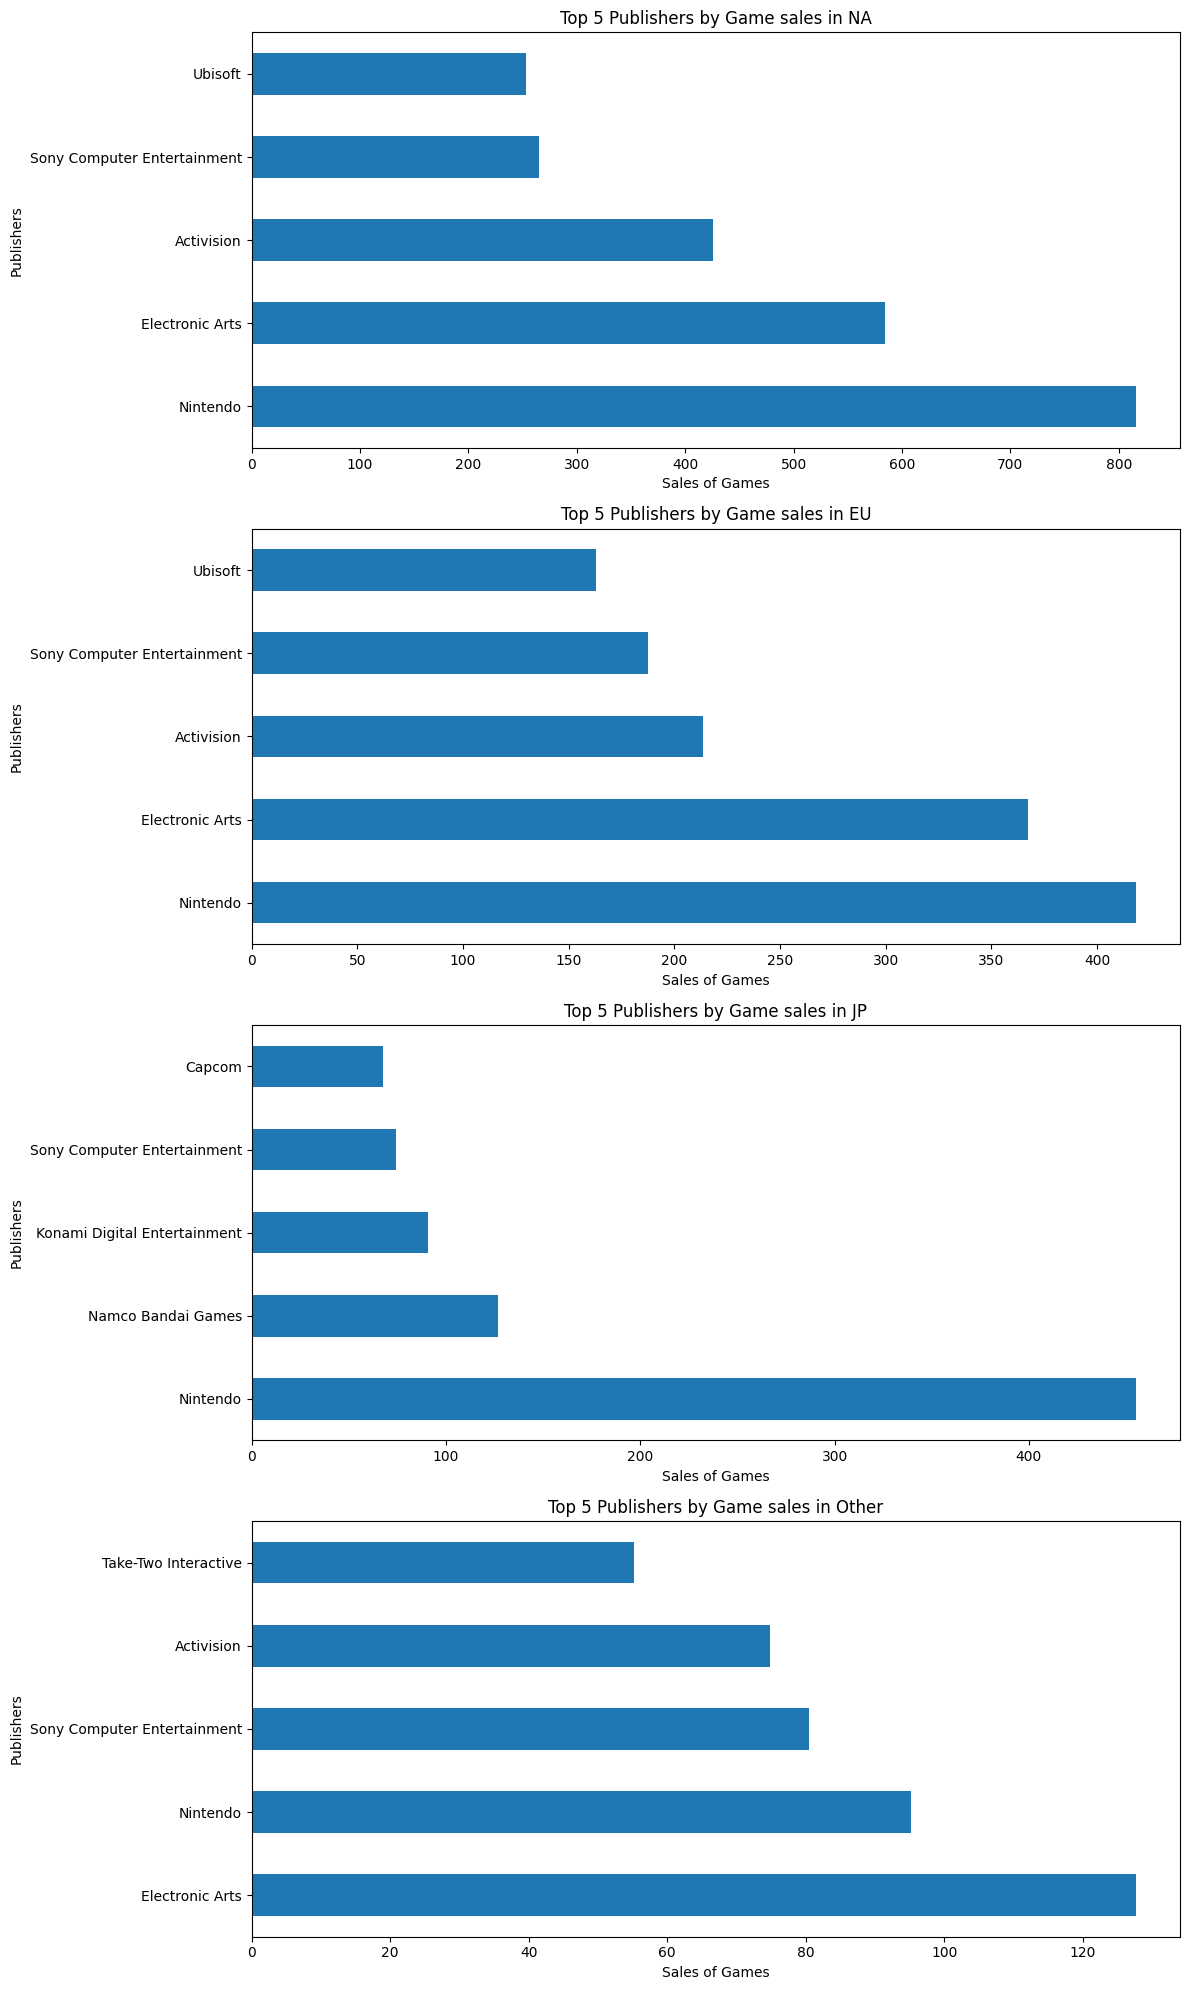

In [100]:
limit = 5
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

plt.figure(figsize=(12,20))
for i, region in enumerate(regions):
    ax = plt.subplot(4,1,i+1)
    temp = df[df[region] > 0][["Publisher", region]]
    top_publishers = temp.groupby("Publisher")[region].sum().sort_values(ascending=False)[:limit]
    top_publishers.plot(kind="barh", ax=ax)
    plt.title(f"Top {limit} Publishers by Game sales in {region.split('_')[0]}")
    plt.xlabel("Sales of Games")
    plt.ylabel("Publishers")
plt.tight_layout()
plt.show()


#### **Which region purchases the most video games?**

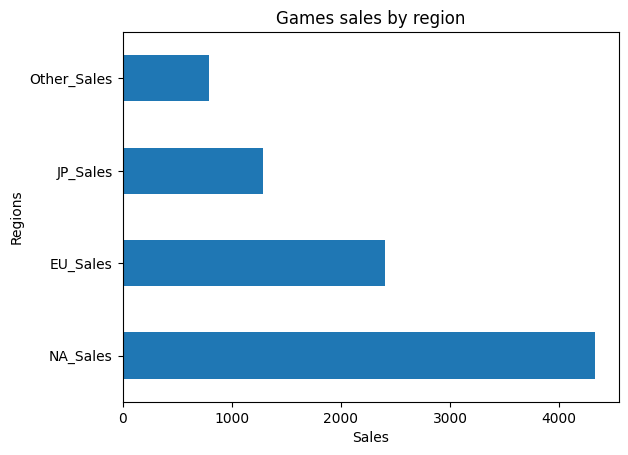

In [101]:
regions_sales = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
regions_sales.sum().plot(kind="barh")
plt.title("Games sales by region")
plt.xlabel("Sales")
plt.ylabel("Regions")
plt.show()

The most games are purchased in North america.

#### **What are the top 1 raking games of each region over the year?**

In [33]:
regions = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
dic = {}
for r in regions:
    region_data = df[['Name','Year',r]]
    rg = region_data.groupby(["Year","Name"])[r].sum()
    indices = np.unique(np.array([i[0] for i in rg.index]))
    top_game_each_year = []
    for j in indices:
        if rg[j].max() == 0.0:
            top_game_each_year.append(
                "Not given"
            )
        else:
            top_game_each_year.append(
                f"{rg[j].idxmax()} with {round(rg[j].max(),2)} millions sale"
            )
    dic[r] = [indices, top_game_each_year]

td = pd.DataFrame(
    {"Year":dic[[*dic.keys()][0]][0], [*dic.keys()][0]:dic[[*dic.keys()][0]][1]}
)
for i in regions[1:]:
    temp = {"Year":None}
    temp["Year"] = dic[i][0]
    temp[i] = dic[i][1]
    temp_df = pd.DataFrame(
        temp
        )
    td = pd.merge(left=td, right=temp_df, how="outer", on="Year")

td.T

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
NA_Sales,Asteroids with 4.0 millions sale,Pitfall! with 4.21 millions sale,Pac-Man with 7.28 millions sale,Pitfall II: Lost Caverns with 1.22 millions sale,Duck Hunt with 26.93 millions sale,Super Mario Bros. with 29.08 millions sale,The Legend of Zelda with 3.74 millions sale,Zelda II: The Adventure of Link with 2.19 mill...,Super Mario Bros. 3 with 9.54 millions sale,Tetris with 23.2 millions sale,...,Wii Sports Resort with 15.75 millions sale,Call of Duty: Black Ops with 17.01 millions sale,Call of Duty: Modern Warfare 3 with 15.58 mill...,Call of Duty: Black Ops II with 14.08 millions...,Grand Theft Auto V with 16.64 millions sale,Call of Duty: Advanced Warfare with 10.44 mill...,Call of Duty: Black Ops 3 with 11.89 millions ...,Tom Clancy's The Division with 2.68 millions sale,Not given,Imagine: Makeup Artist with 0.27 millions sale
EU_Sales,Asteroids with 0.26 millions sale,Pitfall! with 0.24 millions sale,Pac-Man with 0.45 millions sale,Mario Bros. with 0.12 millions sale,Duck Hunt with 0.63 millions sale,Super Mario Bros. with 3.58 millions sale,The Legend of Zelda with 0.93 millions sale,Zelda II: The Adventure of Link with 0.5 milli...,Super Mario Bros. 3 with 3.44 millions sale,Super Mario Land with 2.71 millions sale,...,Wii Sports Resort with 11.01 millions sale,Call of Duty: Black Ops with 8.69 millions sale,Call of Duty: Modern Warfare 3 with 11.29 mill...,Call of Duty: Black Ops II with 11.05 millions...,Grand Theft Auto V with 14.58 millions sale,FIFA 15 with 12.4 millions sale,FIFA 16 with 11.29 millions sale,FIFA 17 with 5.48 millions sale,Not given,Not given
JP_Sales,Not given,Not given,Not given,Baseball with 2.35 millions sale,Golf with 2.46 millions sale,Super Mario Bros. with 6.81 millions sale,Super Mario Bros.: The Lost Levels with 2.65 m...,Dragon Warrior II with 2.41 millions sale,Super Mario Bros. 3 with 3.84 millions sale,Tetris with 4.22 millions sale,...,New Super Mario Bros. Wii with 4.7 millions sale,Pokemon Black/Pokemon White with 5.65 millions...,Mario Kart 7 with 2.67 millions sale,Animal Crossing: New Leaf with 4.36 millions sale,Pokemon X/Pokemon Y with 4.34 millions sale,Super Smash Bros. for Wii U and 3DS with 3.22 ...,Monster Hunter X with 2.78 millions sale,Yokai Watch 3 with 1.27 millions sale,Phantasy Star Online 2 Episode 4: Deluxe Packa...,Not given
Other_Sales,Asteroids with 0.05 millions sale,Pitfall! with 0.05 millions sale,Pac-Man with 0.08 millions sale,Baseball with 0.02 millions sale,Duck Hunt with 0.47 millions sale,Super Mario Bros. with 0.77 millions sale,Dragon Warrior with 1.51 millions sale,Zelda II: The Adventure of Link with 0.08 mill...,Super Mario Bros. 3 with 0.46 millions sale,Tetris with 0.58 millions sale,...,Call of Duty: Modern Warfare 2 with 3.01 milli...,Call of Duty: Black Ops with 3.12 millions sale,Call of Duty: Modern Warfare 3 with 3.35 milli...,Call of Duty: Black Ops II with 3.88 millions ...,Grand Theft Auto V with 5.52 millions sale,FIFA 15 with 3.29 millions sale,Call of Duty: Black Ops 3 with 3.42 millions sale,FIFA 17 with 0.85 millions sale,Not given,Imagine: Makeup Artist with 0.02 millions sale


#### **What are the top 5 most sold games?**

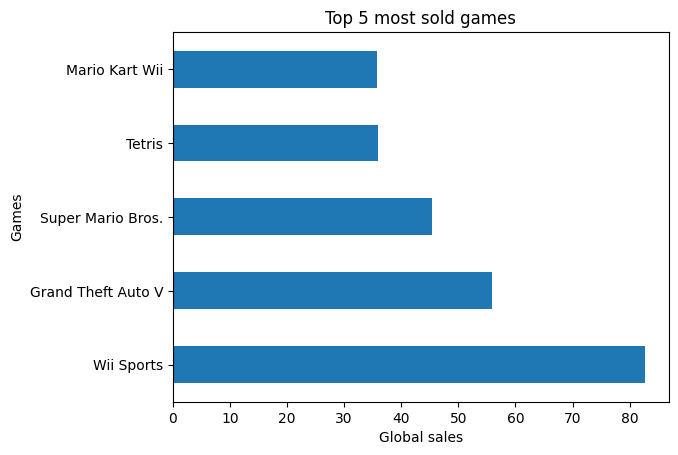

In [34]:
limit = 5
df.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)[:limit].plot(kind="barh")
plt.title(f"Top {limit} most sold games")
plt.xlabel("Global sales")
plt.ylabel("Games")
plt.show()

This bar chart depicts the top-selling video games. Wii Sports dominates with over 80 million global sales. Grand Theft Auto V follows, trailed by Super Mario Bros., Tetris, and Mario Kart Wii. Wii Sports Resort also ranks high, illustrating Nintendo’s strong presence among the industry’s best sellers.

#### **What are the top 5 most sold games in each regions?**

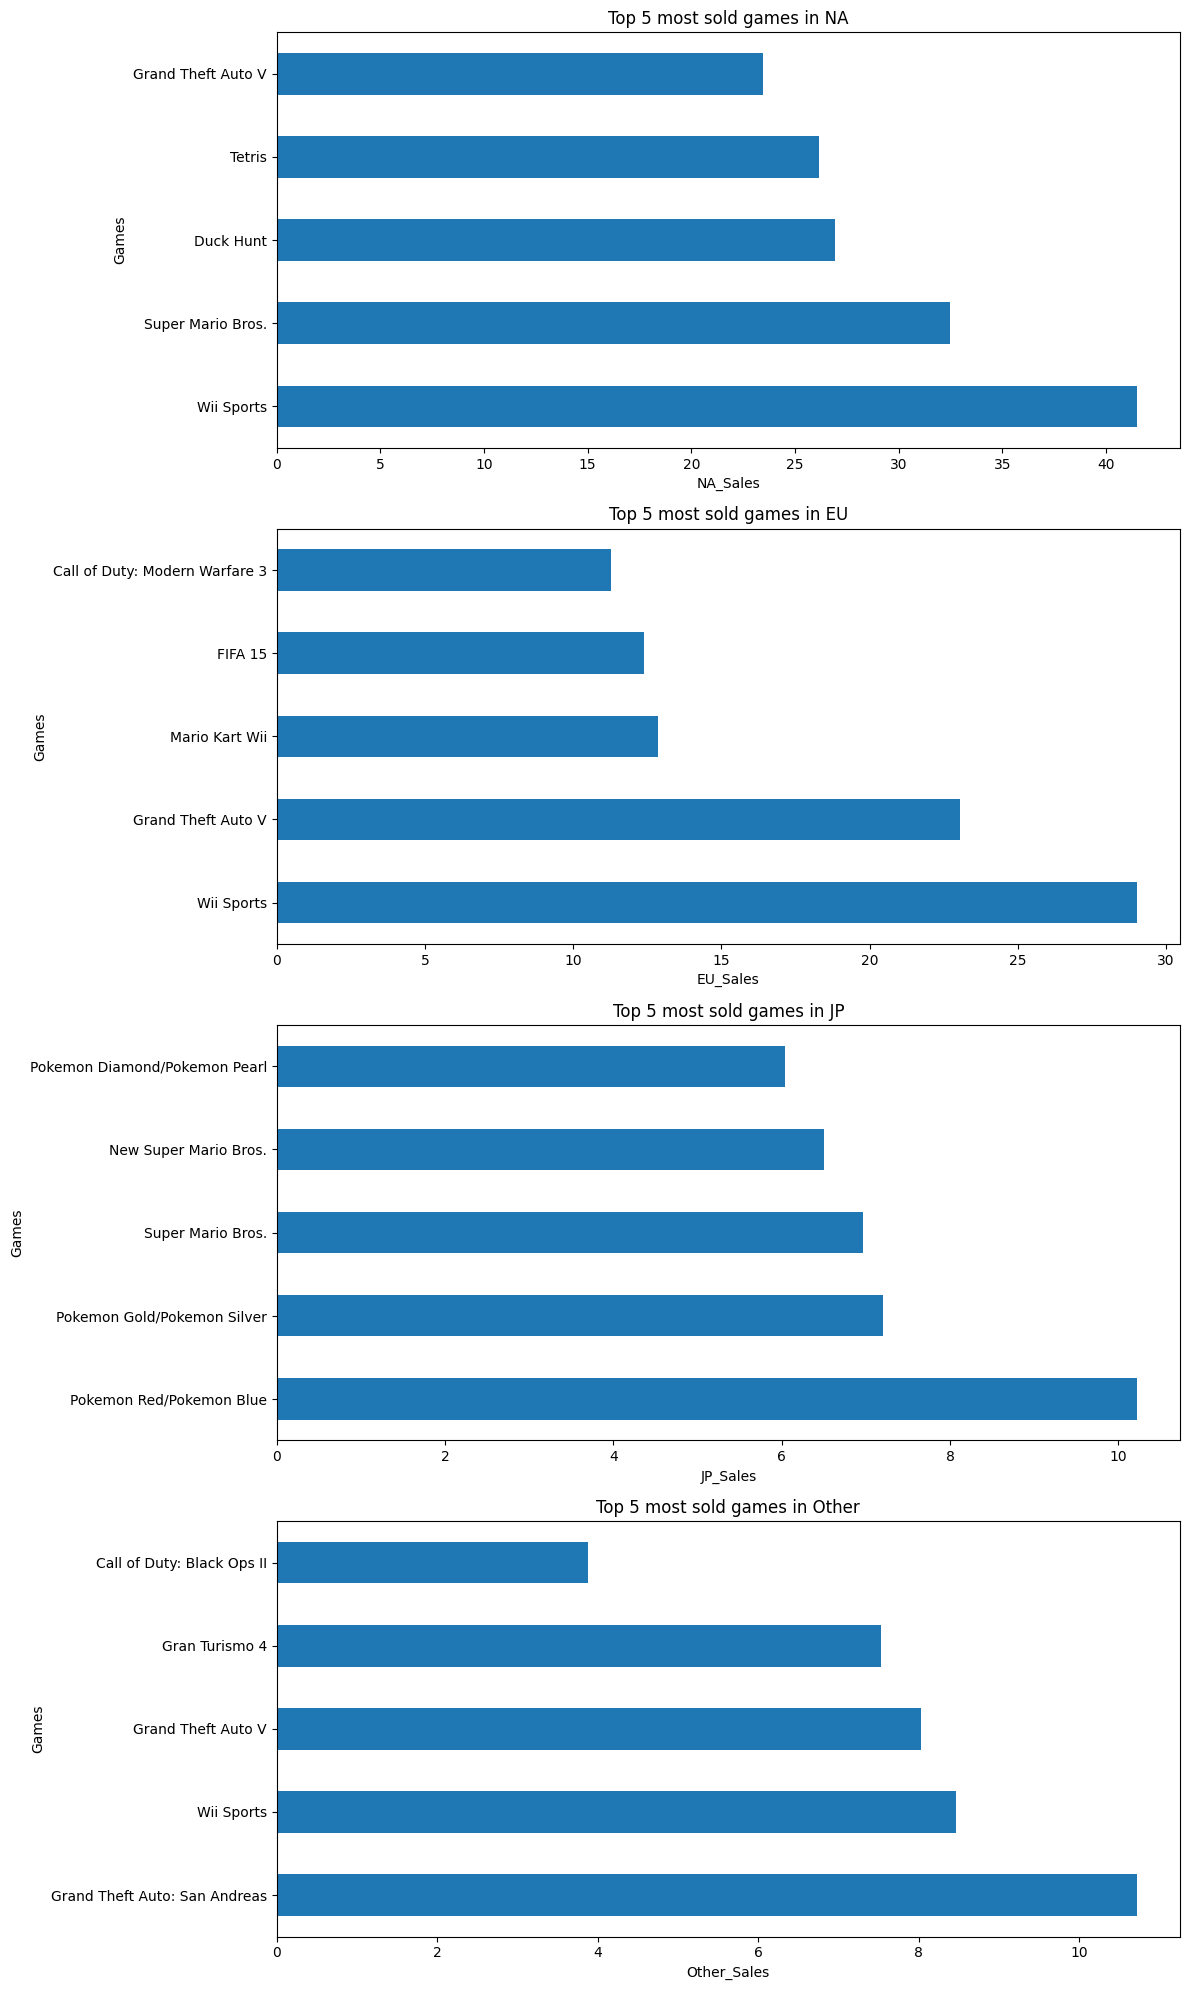

In [35]:
limit = 5
regions = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize=(12,20))
for i,v in enumerate(regions):
    ax = plt.subplot(4,1,i+1)
    d = df[['Name', v]]

    d.groupby("Name")[v].sum().sort_values(ascending=False)[:limit].plot(kind="barh", ax=ax)
    plt.title(f"Top {limit} most sold games in {v.split('_')[0]}")
    plt.xlabel(f"{v}")
    plt.ylabel("Games")
plt.tight_layout()
plt.show()

#### **Is there any game that published on every platform?**

In [36]:
p = df['Platform'].unique()
g = df['Name'].unique()
for i in g:
    temp = df[df['Name'] == i]
    if len(temp['Platform']) == len(p):
        print(f"{i} published in all platforms")
else:
    print("Not found any games published in all platforms")

Not found any games published in all platforms


# Insights

- **Dataset Overview**:
  - The dataset comprises **16,598 entries** with **11 columns**, including game titles, platforms, release years, genres, publishers, and sales figures across North America (NA), Europe (EU), Japan (JP), Other regions, and globally.
  - It includes **576 unique publishers** and **12 unique genres**.

- **Platform Insights**:
  - **PS2** and **DS** are the platforms with the highest distribution in the dataset.
  - Globally, **PS2** is the most popular platform, followed by **Xbox 360**.
  - Regional platform preferences:
    - **North America**: Xbox 360
    - **Europe**: PS3
    - **Japan**: DS
    - **Other regions**: PS2

- **Genre Insights**:
  - **Action** is the most popular genre worldwide, followed by **Sports**.
  - Regional genre preferences:
    - **North America**: Action, followed by Sports
    - **Europe**: Action, followed by Sports
    - **Japan**: Role-Playing, followed by Action
    - **Other regions**: Action dominates, with a distribution similar to NA and EU

- **Sales Distribution**:
  - Sales data is **positively skewed**, with most games having low sales and a few achieving exceptionally high sales.
  - **North America** leads in total video game purchases among all regions.

- **Trends Over Time**:
  - Sales peaked in the **late 1980s and early 1990s**, particularly in North America and Japan, followed by a decline and stabilization in later years.
  - Genre popularity also spiked during the **late 1980s and early 1990s** (e.g., Misc, Role-Playing, Puzzle), with more stable trends afterward.

- **Top Publishers**:
  - **Nintendo** is the top publisher globally, with approximately **1,760 million** in global sales, followed by **Electronic Arts** with around **1,200 million**.
  - Other notable publishers include **Activision**, **Sony Computer Entertainment**, and **Ubisoft**, with rankings varying by region.

- **Top Games**:
  - Globally, **Wii Sports** is the top-selling game with over **80 million** in sales, followed by **Grand Theft Auto V**, **Super Mario Bros.**, **Tetris**, and **Mario Kart Wii**.
  - Regional top games vary but often feature franchises like Mario, Grand Theft Auto, and sports titles (e.g., Wii Sports Resort).

- **Correlation**:
  - A **correlation heatmap** indicates relationships between regional sales,from the correlation we can observe that both NA and EU have almost same sale correlation and other countries and EU have almost same sale correlation. On the other hand, JP sales has completely different correlation with other region's sales.

These insights highlight key patterns in the video game industry, including dominant platforms, genre preferences, regional differences, and the influence of major publishers and blockbuster titles.